### Implement KNN for binary class classification problem.

In [38]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the data
df = pd.read_csv('Dataset/waterpark.csv')
df

,Age,Height(in cm),Weight (in kg),Can_Ride
0,30,185.4,92.1,No
1,35,167.5,54.1,No
2,22,194.3,91.9,No
3,29,174.5,76.8,No
4,33,188.8,57.1,Yes
...,...,...,...,...
244,21,180.0,90.9,No
245,30,162.0,44.6,No
246,44,196.3,51.0,Yes
247,44,177.1,89.4,No


In [40]:
# Checking null values
print(df.isnull().sum())

Age               0
Height(in cm)     0
Weight (in kg)    0
Can_Ride          0
dtype: int64


In [41]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             249 non-null    int64  
 1   Height(in cm)   249 non-null    float64
 2   Weight (in kg)  249 non-null    float64
 3   Can_Ride        249 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 7.9+ KB


In [42]:
# Encoding categorical data
# Encoding the 'Can_Ride' column
df['Can_Ride'] = df['Can_Ride'].map({'No':0, 'Yes': 1,})

# Displaying the dataset with encoded categorical data
print("\n\nEncoded Dataset:")
print(df.head(10))



Encoded Dataset:
   Age  Height(in cm)  Weight (in kg)  Can_Ride
0   30          185.4            92.1         0
1   35          167.5            54.1         0
2   22          194.3            91.9         0
3   29          174.5            76.8         0
4   33          188.8            57.1         1
5   25          172.4            72.0         1
6   25          174.8            57.2         1
7   21          153.5            59.6         0
8   41          180.8            85.3         0
9   35          193.3            78.7         0


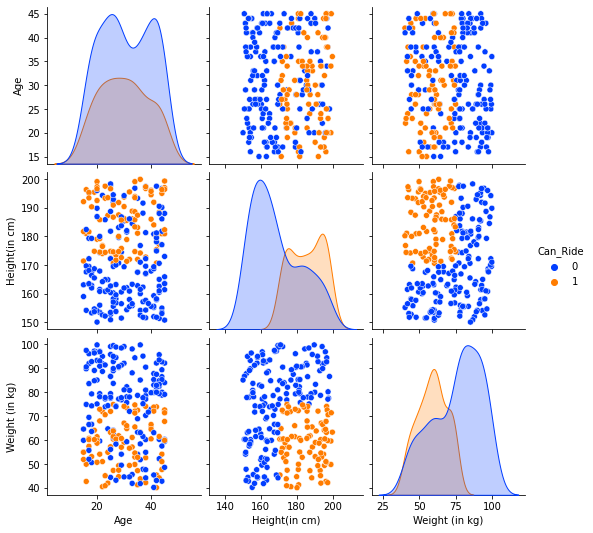

In [43]:
# Pairplot to visualize relationships between variables
sns.pairplot(df, hue='Can_Ride',palette='bright')
plt.show()

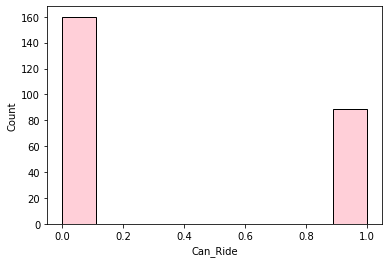

In [44]:
# Histogram to visualise the target
sns.histplot(df['Can_Ride'], color='pink')
plt.show()

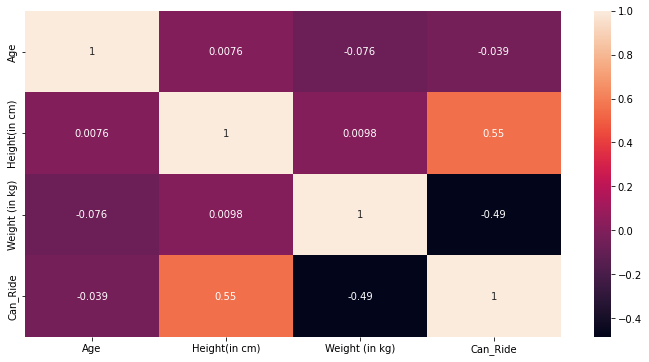

In [45]:
# Correlation matrix for the dataset
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='Can_Ride', ylabel='Weight (in kg)'>

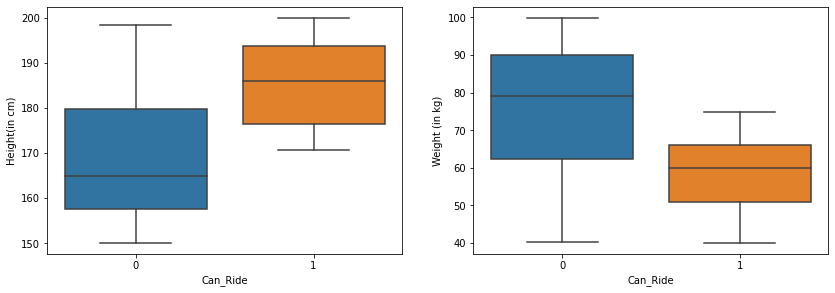

In [46]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x='Can_Ride',y='Height(in cm)',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Can_Ride',y='Weight (in kg)',data=df)

In [47]:
# Extracting features and target
X = df[['Height(in cm)', 'Weight (in kg)']]
y = df['Can_Ride']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
# Determine the value of K using the elbow method
k_values = range(3, 12)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

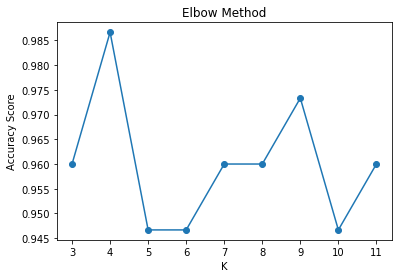

In [49]:
# Plot the accuracy scores for different values of K
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.title('Elbow Method')
plt.show()

In [50]:
# Find the optimized value of K
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print("Optimal value of K:", optimal_k)

Optimal value of K: 4


In [51]:
# Train the KNN model with the optimized value of K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [52]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [53]:
# Evaluating the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9866666666666667
Precision: 1.0
Recall: 0.96875
F1 Score: 0.9841269841269841
Confusion Matrix:
 [[43  0]
 [ 1 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.97      0.98        32

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



c:\Users\shubh\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


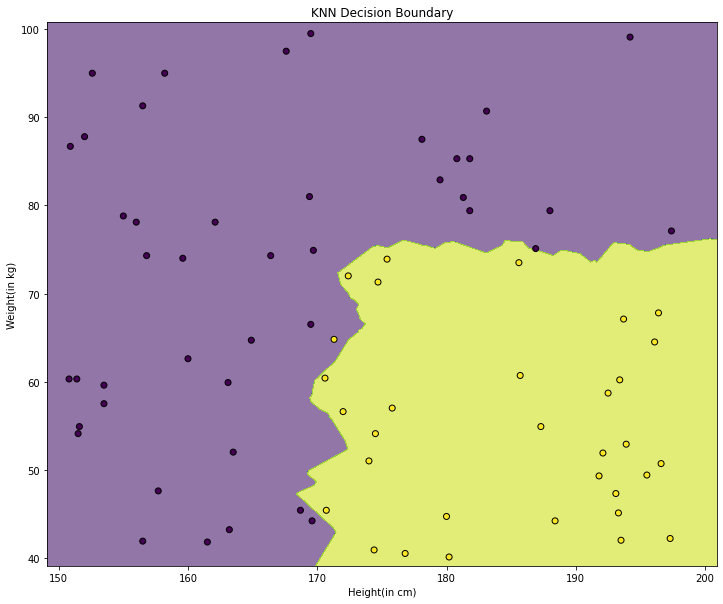

In [54]:
# Plot decision boundary
x_min, x_max = X['Height(in cm)'].min() - 1, X['Height(in cm)'].max() + 1
y_min, y_max = X['Weight (in kg)'].min() - 1, X['Weight (in kg)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,10))
plt.contourf(xx, yy, Z, alpha=0.6)
plt.scatter(X_test['Height(in cm)'], X_test['Weight (in kg)'], c=y_test, edgecolor='black')
plt.xlabel('Height(in cm)')
plt.ylabel('Weight(in kg)')
plt.title('KNN Decision Boundary')
plt.show()